In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("/content/sample_data/test.csv")

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.dtypes[train_data.dtypes!='object']

,0
Id,int64
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64


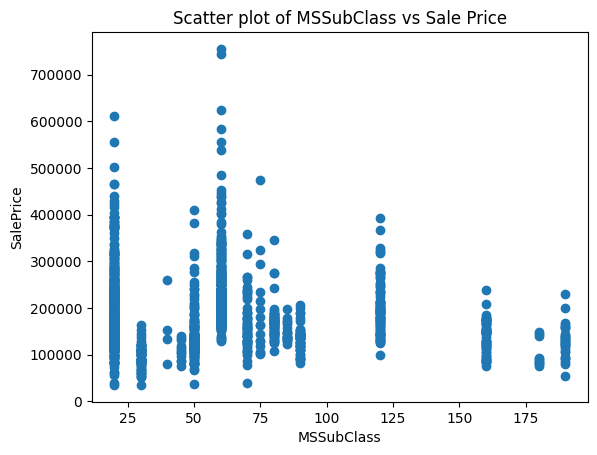

In [6]:
plt.scatter(x=train_data['MSSubClass'], y=train_data['SalePrice'])
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Scatter plot of MSSubClass vs Sale Price')
plt.show()


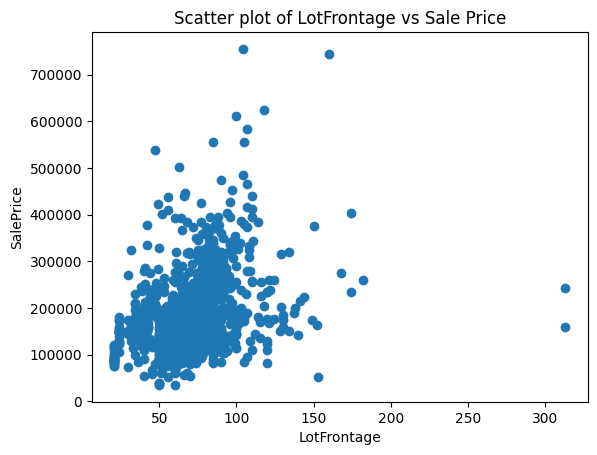

In [7]:
plt.scatter(x=train_data['LotFrontage'], y=train_data['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter plot of LotFrontage vs Sale Price')
plt.show()


In [8]:
train_data.query('LotFrontage>300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


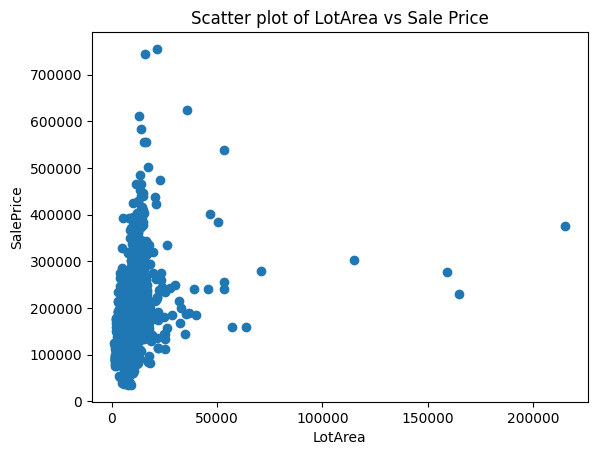

In [9]:
plt.scatter(x=train_data['LotArea'], y=train_data['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot of LotArea vs Sale Price')
plt.show()


In [10]:
train_data.query('LotArea>55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [11]:
pd.Series(stats.zscore(train_data['LotArea'])).sort_values().tail(10)

,LotArea
384,4.268474
457,4.280500
769,4.308262
1396,4.678682
1298,5.348867
451,6.037793
706,10.486449
249,14.881285
335,15.448542
313,20.518273


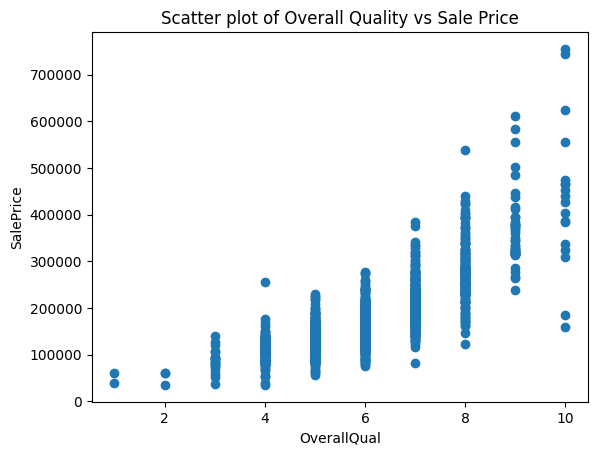

In [12]:
plt.scatter(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Scatter plot of Overall Quality vs Sale Price')
plt.show()


In [13]:
train_data.query('OverallQual==10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


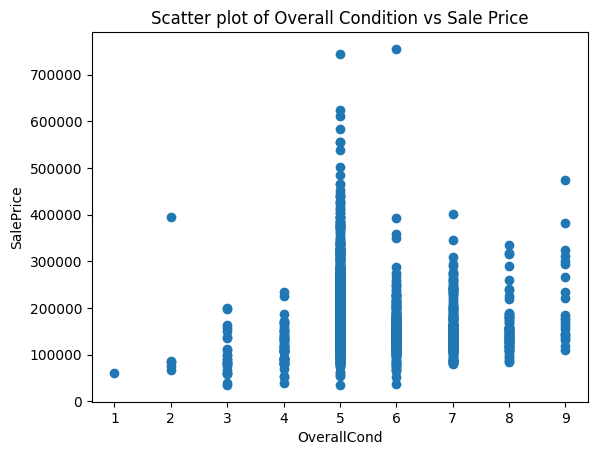

In [14]:
plt.scatter(x=train_data['OverallCond'], y=train_data['SalePrice'])
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.title('Scatter plot of Overall Condition vs Sale Price')
plt.show()


In [15]:
train_data.query('OverallCond==2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [16]:
train_data.query('OverallCond==5 & SalePrice>700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [17]:
train_data.query('OverallCond==6 & SalePrice>700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


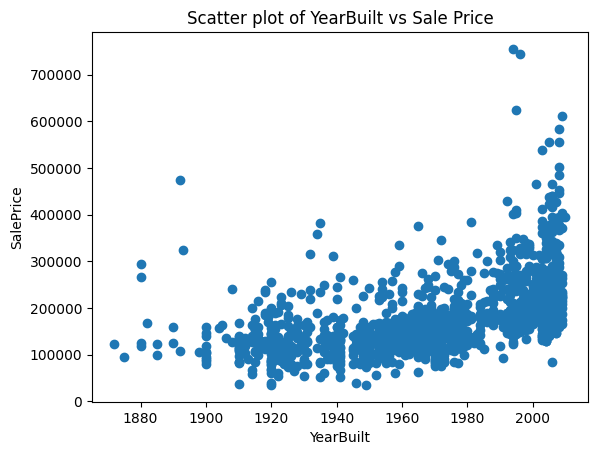

In [18]:
plt.scatter(x=train_data['YearBuilt'], y=train_data['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Scatter plot of YearBuilt vs Sale Price')
plt.show()


In [19]:
train_data.query('YearBuilt<1900 & SalePrice>400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


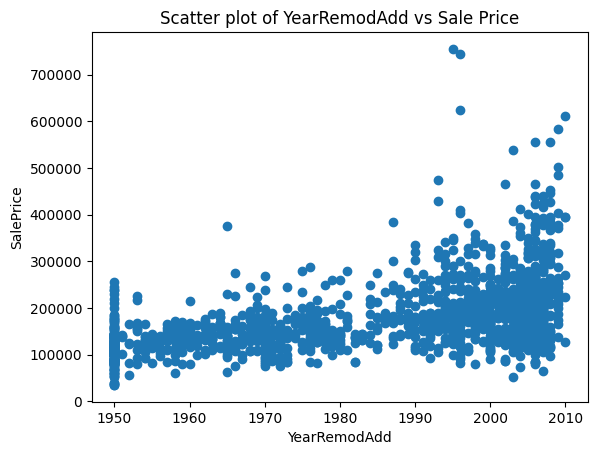

In [20]:
plt.scatter(x=train_data['YearRemodAdd'], y=train_data['SalePrice'])
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title('Scatter plot of YearRemodAdd vs Sale Price')
plt.show()


In [21]:
train_data.query('YearRemodAdd<1970 & SalePrice>300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


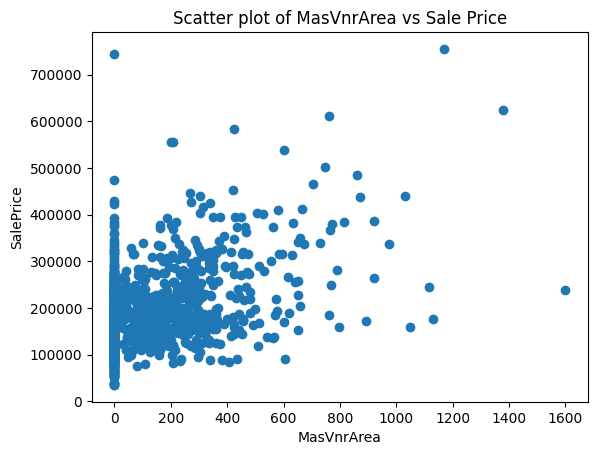

In [22]:

plt.scatter(x=train_data['MasVnrArea'], y=train_data['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot of MasVnrArea vs Sale Price')
plt.show()


In [23]:
train_data.query('MasVnrArea>1500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


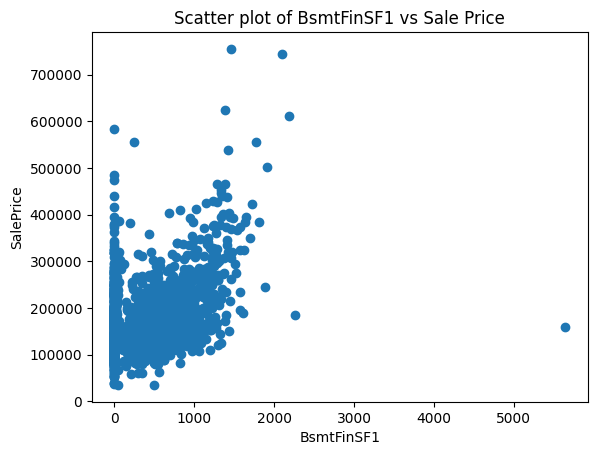

In [24]:
plt.scatter(x=train_data['BsmtFinSF1'], y=train_data['SalePrice'])
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BsmtFinSF1 vs Sale Price')
plt.show()


In [25]:
train_data.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


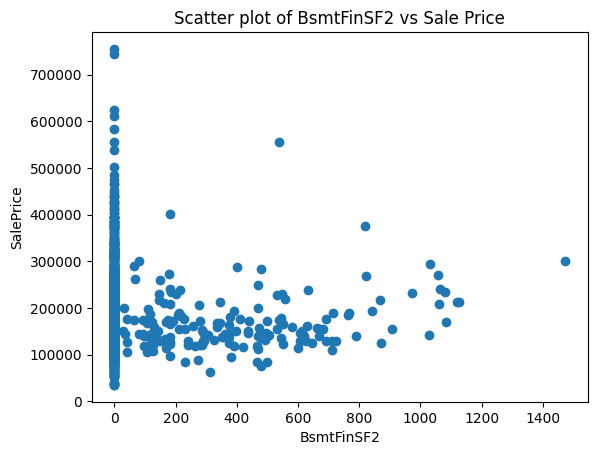

In [26]:

plt.scatter(x=train_data['BsmtFinSF2'], y=train_data['SalePrice'])
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BsmtFinSF2 vs Sale Price')
plt.show()


In [27]:
train_data.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


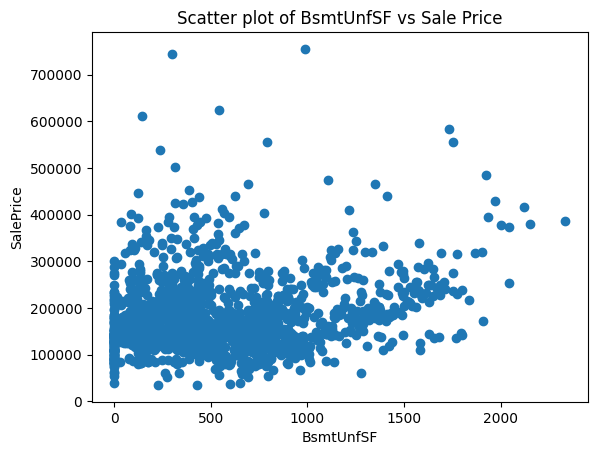

In [28]:
plt.scatter(x=train_data['BsmtUnfSF'], y=train_data['SalePrice'])
plt.xlabel('BsmtUnfSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BsmtUnfSF vs Sale Price')
plt.show()


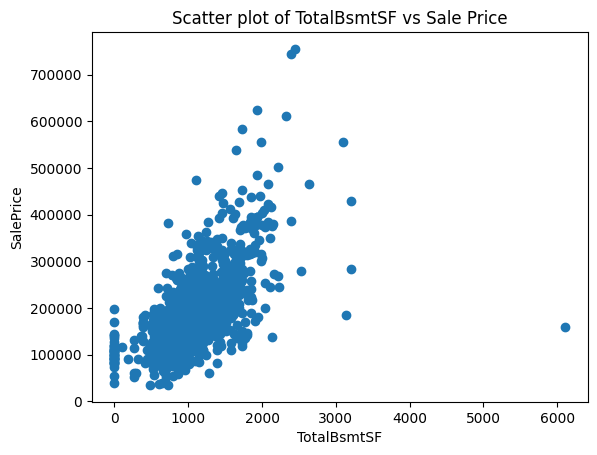

In [29]:
plt.scatter(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of TotalBsmtSF vs Sale Price')
plt.show()

In [30]:
train_data.query('TotalBsmtSF > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'Scatter plot of 1stFlrSF vs Sale Price')

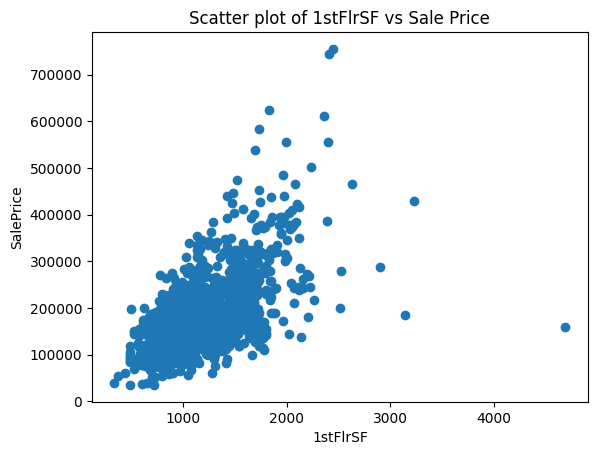

In [31]:
plt.scatter(x=train_data['1stFlrSF'], y=train_data['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of 1stFlrSF vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of 2ndFlrSF vs Sale Price')

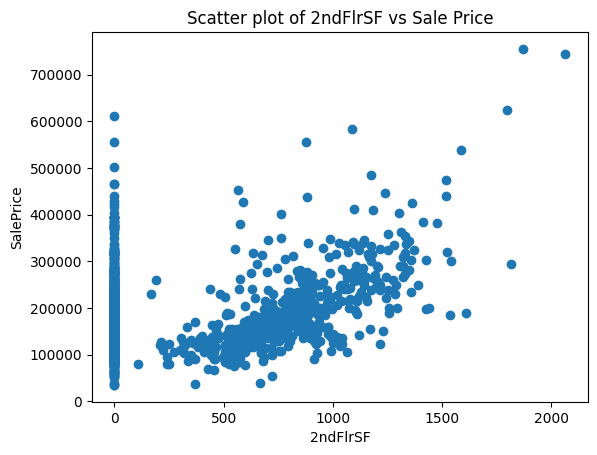

In [32]:
plt.scatter(x=train_data['2ndFlrSF'], y=train_data['SalePrice'])
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of 2ndFlrSF vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of LowQualFinSF vs Sale Price')

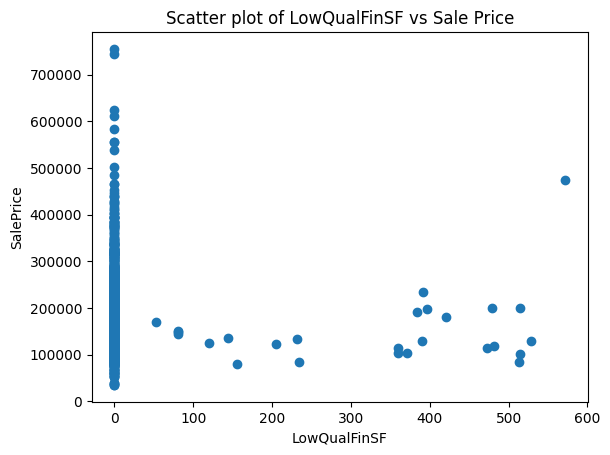

In [33]:
plt.scatter(x=train_data['LowQualFinSF'], y=train_data['SalePrice'])
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of LowQualFinSF vs Sale Price')

In [34]:
train_data.query('LowQualFinSF > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


Text(0.5, 1.0, 'Scatter plot of GrLivArea vs Sale Price')

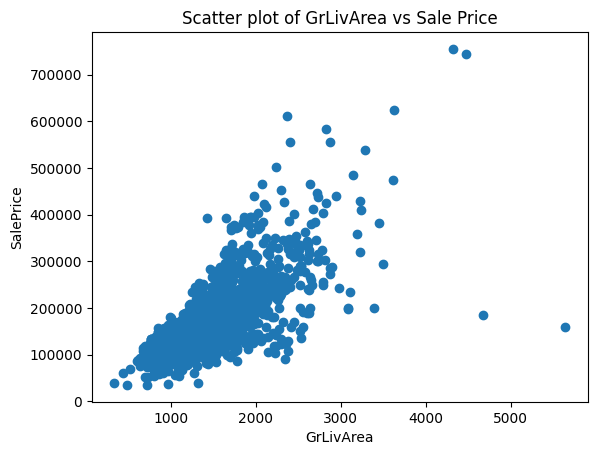

In [35]:
plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot of GrLivArea vs Sale Price')

In [36]:
train_data.query('GrLivArea > 4400')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'Scatter plot of BsmtFullBath vs Sale Price')

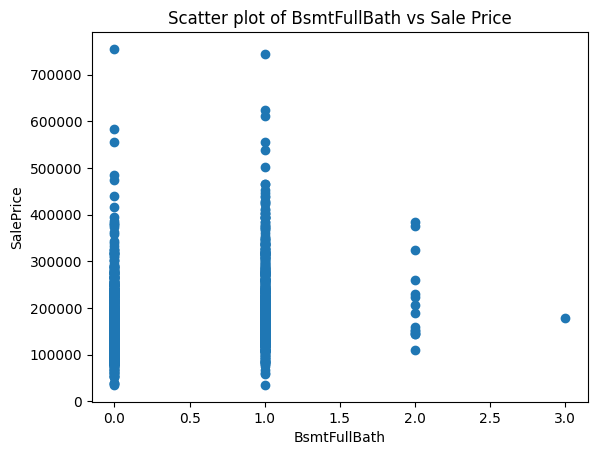

In [37]:
plt.scatter(x=train_data['BsmtFullBath'], y=train_data['SalePrice'])
plt.xlabel('BsmtFullBath')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BsmtFullBath vs Sale Price')

In [38]:
train_data.query('BsmtFullBath ==3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


Text(0.5, 1.0, 'Scatter plot of BsmtHalfBath vs Sale Price')

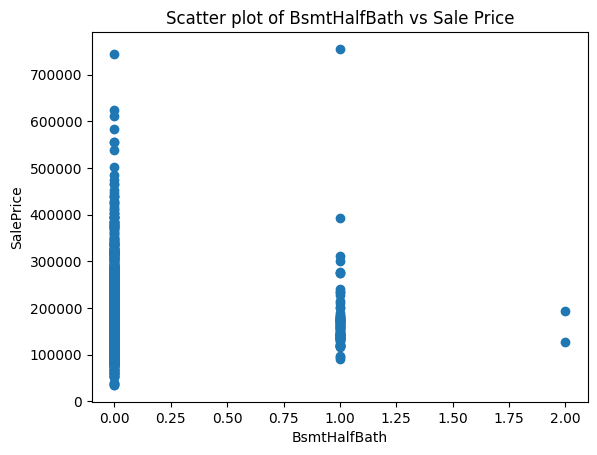

In [39]:
plt.scatter(x=train_data['BsmtHalfBath'], y=train_data['SalePrice'])
plt.xlabel('BsmtHalfBath')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BsmtHalfBath vs Sale Price')

In [40]:
np.unique(stats.zscore(train_data['BsmtHalfBath']))


array([-0.24106104,  3.94880935,  8.13867973])

In [41]:
train_data.query('BsmtHalfBath == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


Text(0.5, 1.0, 'Scatter plot of FullBath vs Sale Price')

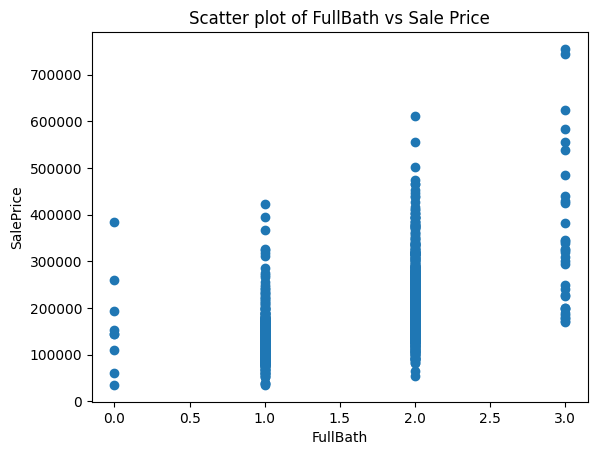

In [42]:






plt.scatter(x=train_data['FullBath'], y=train_data['SalePrice'])
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.title('Scatter plot of FullBath vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of HalfBath vs Sale Price')

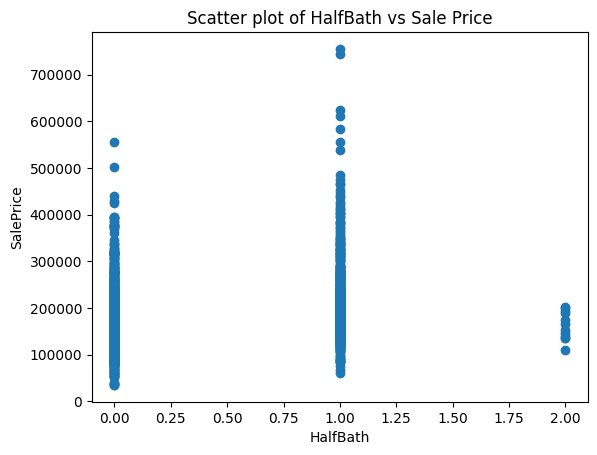

In [43]:
plt.scatter(x=train_data['HalfBath'], y=train_data['SalePrice'])
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.title('Scatter plot of HalfBath vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of BedroomAbvGr vs Sale Price')

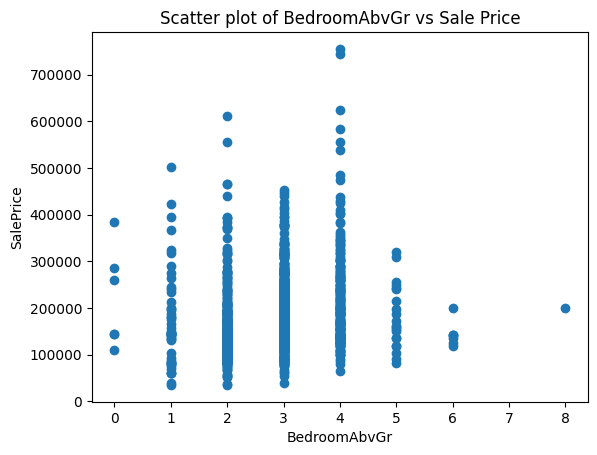

In [44]:
plt.scatter(x=train_data['BedroomAbvGr'], y=train_data['SalePrice'])
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.title('Scatter plot of BedroomAbvGr vs Sale Price')

In [45]:
train_data.query('BedroomAbvGr == 8')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


Text(0.5, 1.0, 'Scatter plot of KitchenAbvGr vs Sale Price')

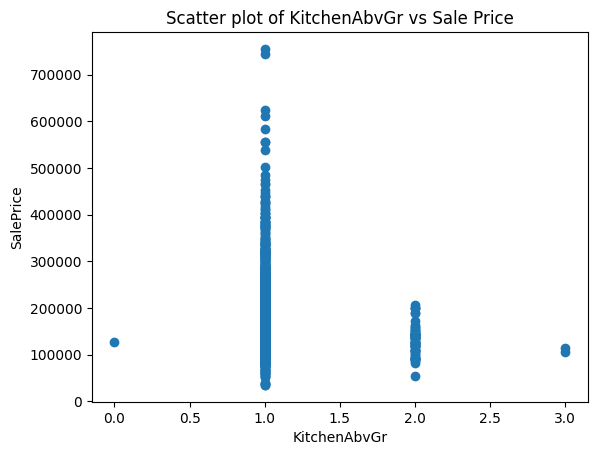

In [46]:
plt.scatter(x=train_data['KitchenAbvGr'], y=train_data['SalePrice'])
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.title('Scatter plot of KitchenAbvGr vs Sale Price')

In [47]:
train_data.query('KitchenAbvGr == 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


Text(0.5, 1.0, 'Scatter plot ofTotRmsAbvGrdl vs Sale Price')

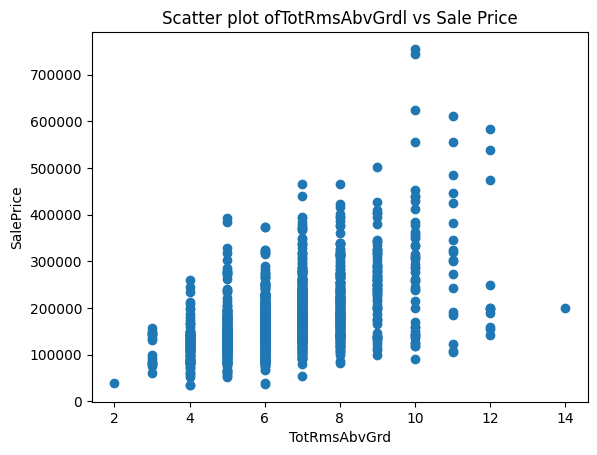

In [48]:
plt.scatter(x=train_data['TotRmsAbvGrd'], y=train_data['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('Scatter plot ofTotRmsAbvGrdl vs Sale Price')
#

In [49]:
train_data.query('TotRmsAbvGrd == 14')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


Text(0.5, 1.0, 'Scatter plot of Fireplaces vs Sale Price')

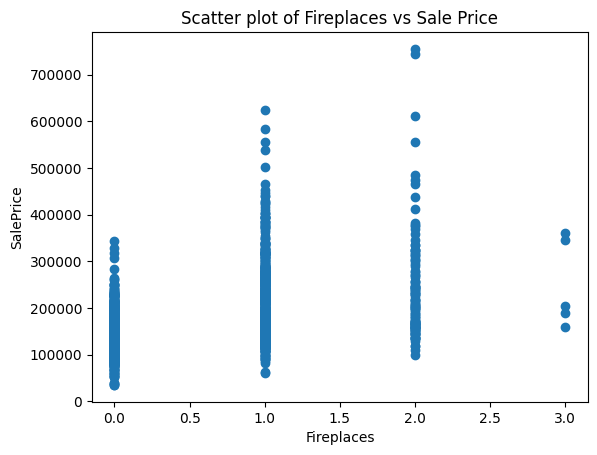

In [50]:
plt.scatter(x=train_data['Fireplaces'], y=train_data['SalePrice'])
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.title('Scatter plot of Fireplaces vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of GarageYrBlt vs Sale Price')

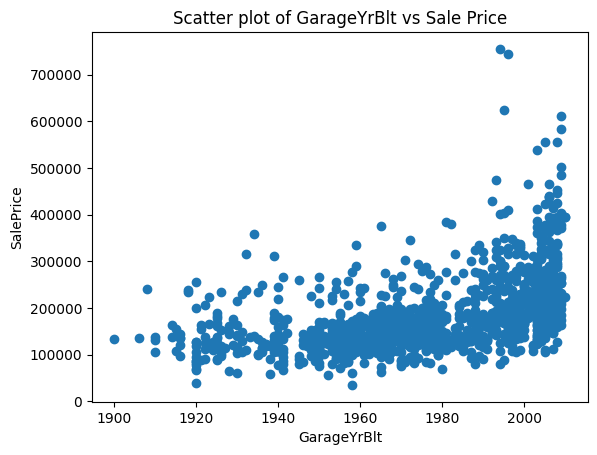

In [51]:
plt.scatter(x=train_data['GarageYrBlt'], y=train_data['SalePrice'])
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title('Scatter plot of GarageYrBlt vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of GarageCars vs Sale Price')

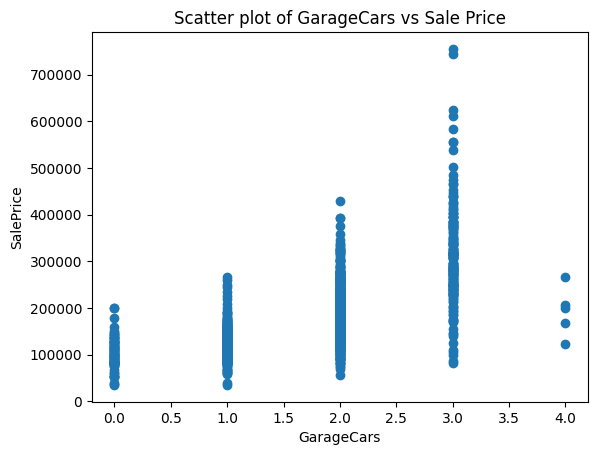

In [52]:
plt.scatter(x=train_data['GarageCars'], y=train_data['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('Scatter plot of GarageCars vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of GarageArea vs Sale Price')

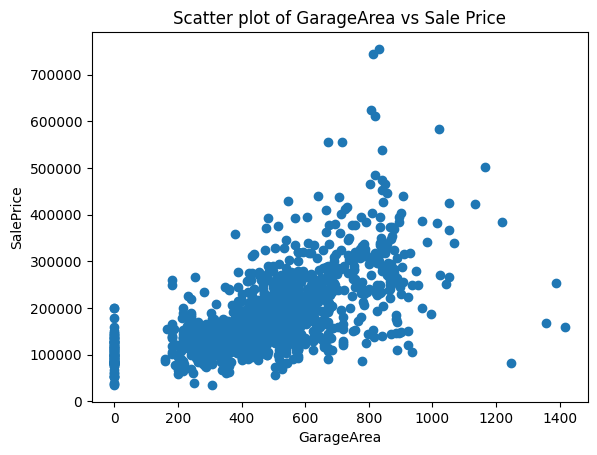

In [53]:
plt.scatter(x=train_data['GarageArea'], y=train_data['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot of GarageArea vs Sale Price')

In [54]:
train_data.query('GarageArea > 1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'Scatter plot of WoodDeckSF vs Sale Price')

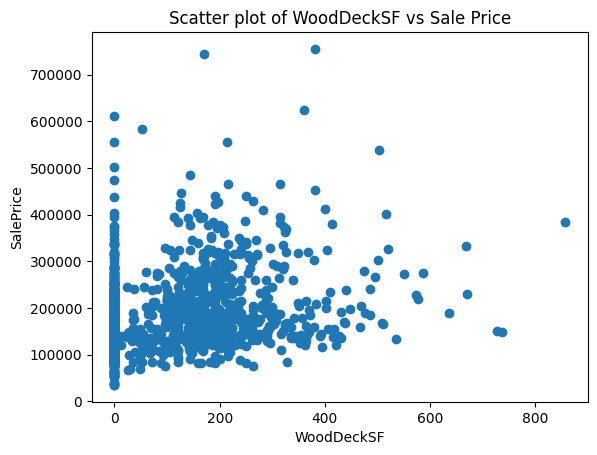

In [55]:
plt.scatter(x=train_data['WoodDeckSF'], y=train_data['SalePrice'])
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of WoodDeckSF vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of OpenPorchSF vs Sale Price')

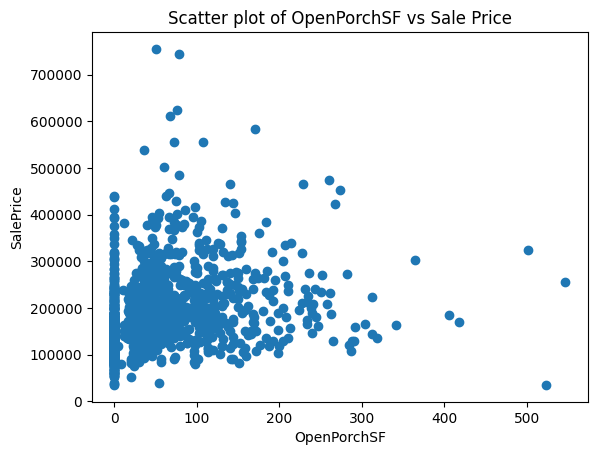

In [56]:
plt.scatter(x=train_data['OpenPorchSF'], y=train_data['SalePrice'])
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')
plt.title('Scatter plot of OpenPorchSF vs Sale Price')

In [57]:
train_data.query('OpenPorchSF > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


Text(0.5, 1.0, 'Scatter plot of EnclosedPorch vs Sale Price')

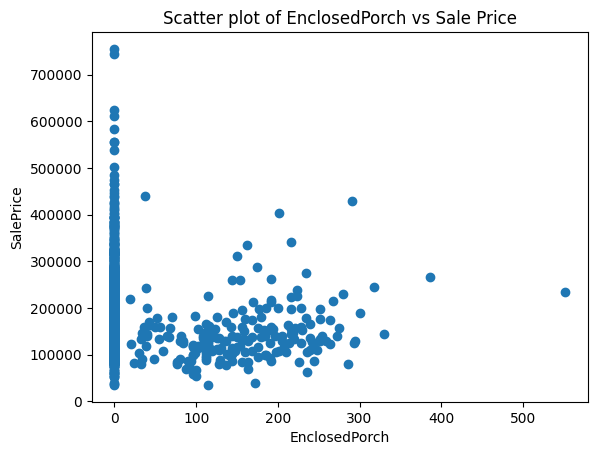

In [58]:
plt.scatter(x=train_data['EnclosedPorch'], y=train_data['SalePrice'])
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')
plt.title('Scatter plot of EnclosedPorch vs Sale Price')

In [59]:
train_data.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


Text(0.5, 1.0, 'Scatter plot of 3SsnPorch vs Sale Price')

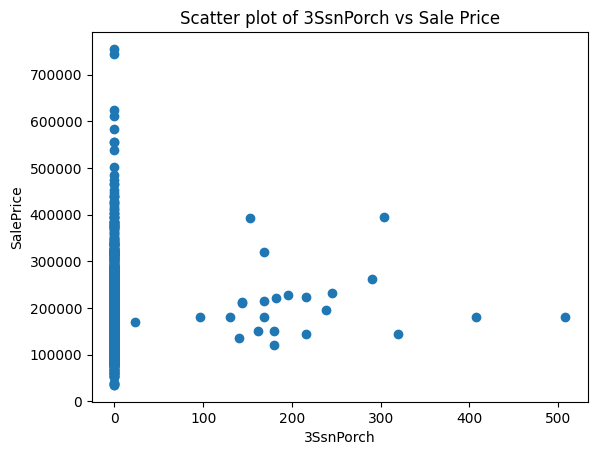

In [60]:
plt.scatter(x=train_data['3SsnPorch'], y=train_data['SalePrice'])
plt.xlabel('3SsnPorch')
plt.ylabel('SalePrice')
plt.title('Scatter plot of 3SsnPorch vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of ScreenPorch vs Sale Price')

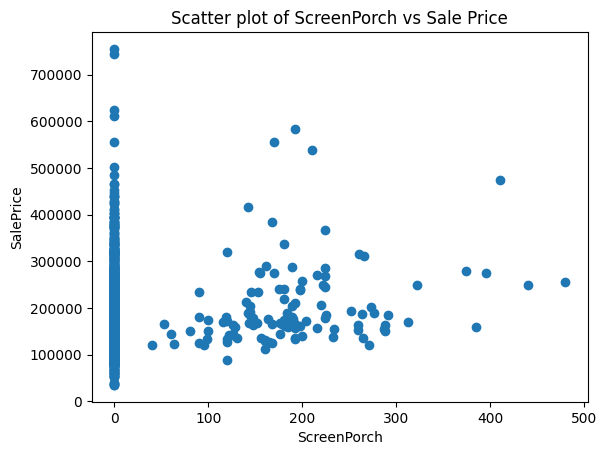

In [61]:
plt.scatter(x=train_data['ScreenPorch'], y=train_data['SalePrice'])
plt.xlabel('ScreenPorch')
plt.ylabel('SalePrice')
plt.title('Scatter plot of ScreenPorch vs Sale Price')

Text(0.5, 1.0, 'Scatter plot of PoolArea vs Sale Price')

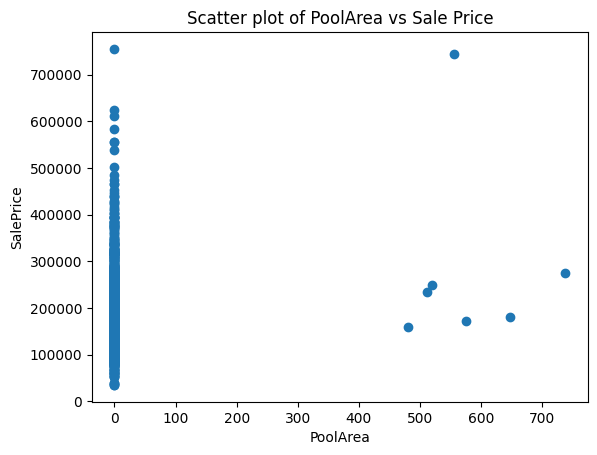

In [62]:
plt.scatter(x=train_data['PoolArea'], y=train_data['SalePrice'])
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot of PoolArea vs Sale Price')

In [63]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [64]:
# remove the rows having these id
train_data=train_data[train_data.Id.isin(values)==False]

In [65]:
# Check,Count & sort the missing values
pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [66]:
# Retrieves all unique values present in MiscFeature
train_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [67]:
# Retrieves all unique values present in Alley
train_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [68]:
# Handle the Missing Values
train_data['Alley'].fillna('No', inplace=True)
test_data['Alley'].fillna('No', inplace=True)

<ipython-input-68-6107a6d6f988>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Alley'].fillna('No', inplace=True)
<ipython-input-68-6107a6d6f988>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<ipython-input-69-422d57bd97f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="Alley", y="SalePrice", kind="box",palette='pastel')


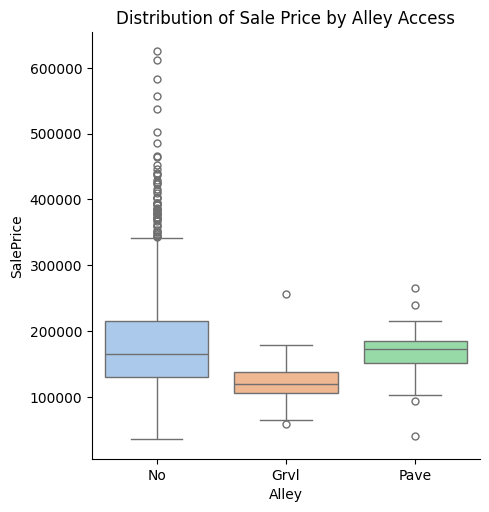

In [69]:
# visualize the distribution of sale price
sns.catplot(data=train_data, x="Alley", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Alley Access")
plt.show()

In [70]:
train_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [71]:
train_data['Fence'].fillna('No', inplace=True)
test_data['Fence'].fillna('No', inplace=True)

<ipython-input-71-84df66715310>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fence'].fillna('No', inplace=True)
<ipython-input-71-84df66715310>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<ipython-input-72-6c63c7451053>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="Fence", y="SalePrice", kind="box",palette='pastel')


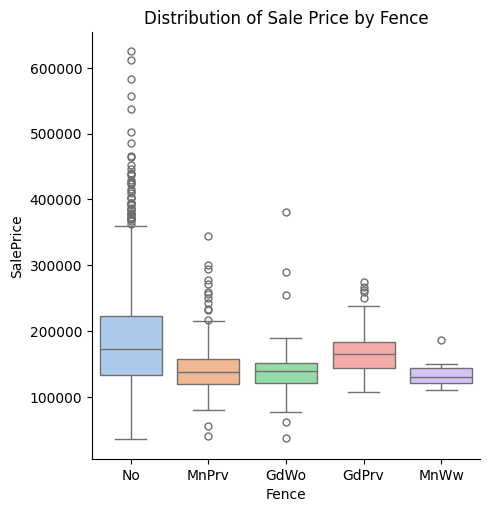

In [72]:
sns.catplot(data=train_data, x="Fence", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Fence")
plt.show()

In [73]:
train_data['MasVnrType'].unique()


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [74]:
train_data['MasVnrType'].fillna('No', inplace=True)
test_data['MasVnrType'].fillna('No', inplace=True)

<ipython-input-74-faba97de0038>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['MasVnrType'].fillna('No', inplace=True)
<ipython-input-74-faba97de0038>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

<ipython-input-75-fcc309001805>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="MasVnrType", y="SalePrice", kind="box",palette='pastel')


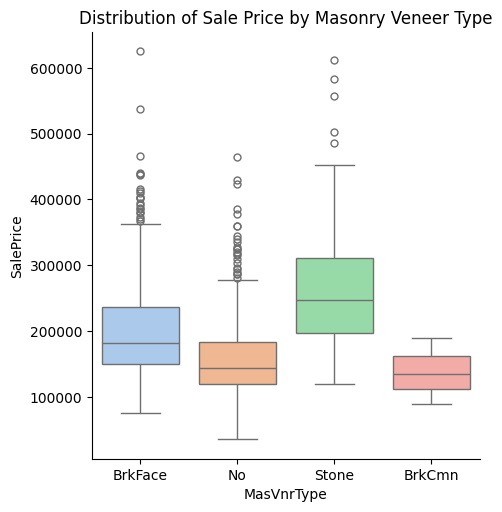

In [75]:
sns.catplot(data=train_data, x="MasVnrType", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Masonry Veneer Type")
plt.show()

In [76]:
train_data['MasVnrArea'].fillna(0, inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-76-6dc11d72e603>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['MasVnrArea'].fillna(0, inplace=True)
<ipython-input-76-6dc11d72e603>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [77]:
train_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [78]:
train_data['FireplaceQu'].fillna('No', inplace=True)
test_data['FireplaceQu'].fillna('No', inplace=True)

<ipython-input-78-b3ce23c4be7f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['FireplaceQu'].fillna('No', inplace=True)
<ipython-input-78-b3ce23c4be7f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

<ipython-input-79-7841bb3f3b61>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="FireplaceQu", y="SalePrice", kind="box" ,palette='pastel')


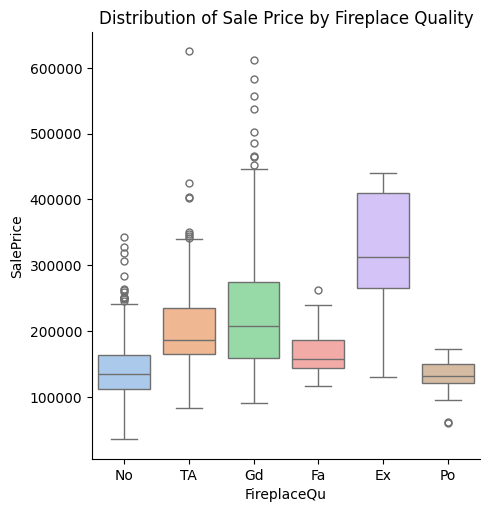

In [79]:
sns.catplot(data=train_data, x="FireplaceQu", y="SalePrice", kind="box" ,palette='pastel')
plt.title("Distribution of Sale Price by Fireplace Quality")
plt.show()

<ipython-input-80-d4ced0a291c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="Fireplaces", y="SalePrice", kind="box",palette='pastel')


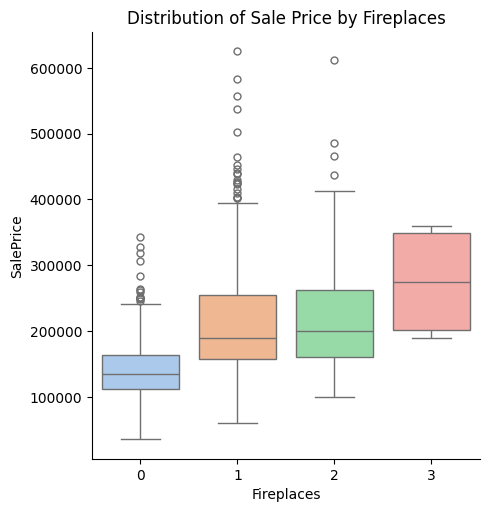

In [80]:
sns.catplot(data=train_data, x="Fireplaces", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Fireplaces")
plt.show()

In [81]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

In [82]:
# calculate the crrelation between GarageYrBlt & YearBuilt
train_data['GarageYrBlt'].corr(train_data['YearBuilt'])

0.8289827595060575

In [83]:
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [84]:
train_data['GarageCond']=train_data['GarageCond'].fillna('No')
test_data['GarageCond']=test_data['GarageCond'].fillna('No')

<ipython-input-85-ab7a841db899>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="GarageCond", y="SalePrice", kind="box",palette='pastel')


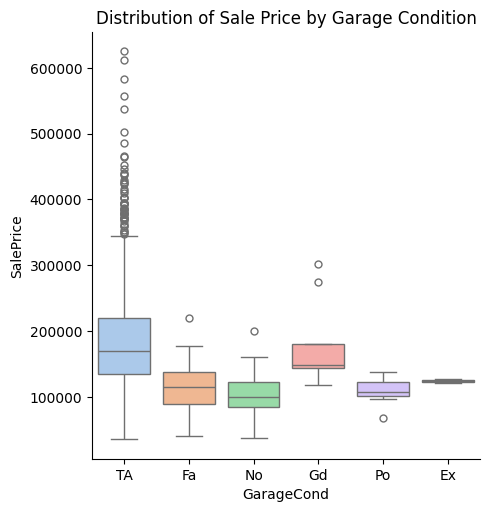

In [85]:
sns.catplot(data=train_data, x="GarageCond", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Garage Condition")
plt.show()

In [86]:
train_data['GarageType']=train_data['GarageType'].fillna('No')
test_data['GarageType']=test_data['GarageType'].fillna('No')

<ipython-input-87-754ecc84b37d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="GarageType", y="SalePrice", kind="box",palette='pastel')


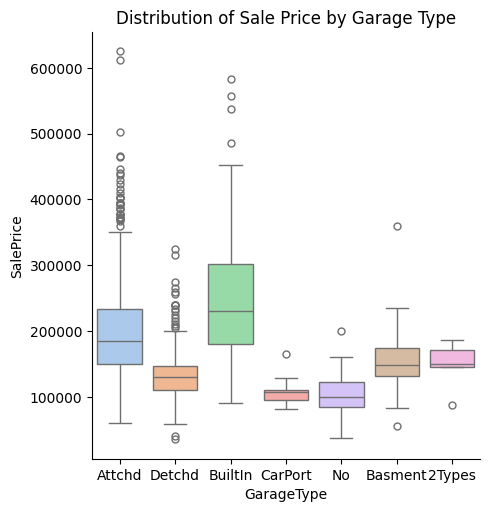

In [87]:
sns.catplot(data=train_data, x="GarageType", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Garage Type")
plt.show()

In [88]:
train_data['GarageFinish']=train_data['GarageFinish'].fillna('No')
test_data['GarageFinish']=test_data['GarageFinish'].fillna('No')

<ipython-input-89-748f776f0dd5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="GarageFinish", y="SalePrice", kind="box",palette='pastel')


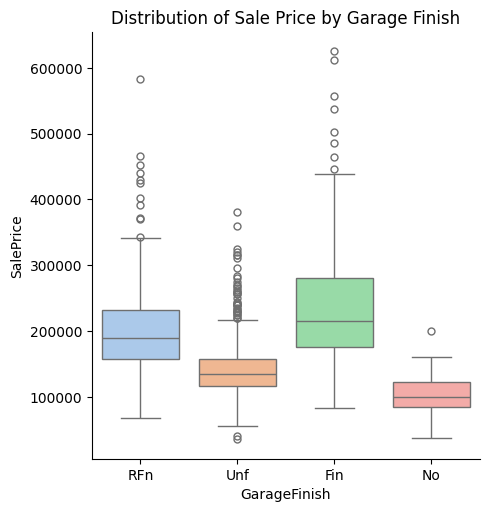

In [89]:
sns.catplot(data=train_data, x="GarageFinish", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Garage Finish")
plt.show()
#

In [90]:
train_data['GarageQual']=train_data['GarageQual'].fillna('No')
test_data['GarageQual']=test_data['GarageQual'].fillna('No')

<ipython-input-91-4cac6a82e35b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="GarageQual", y="SalePrice", kind="box",palette='pastel')


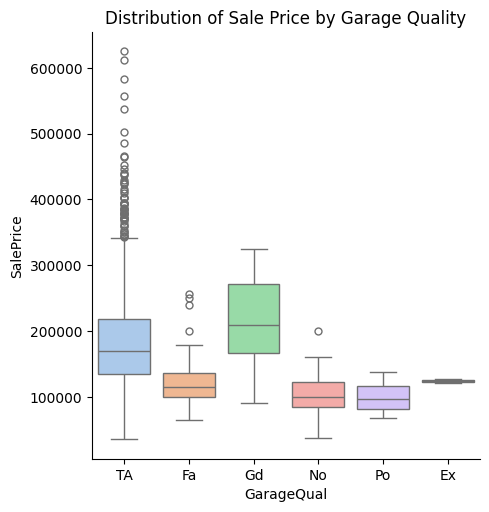

In [91]:
sns.catplot(data=train_data, x="GarageQual", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Garage Quality")
plt.show()

In [92]:
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [93]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('Unf')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('Unf')


<ipython-input-94-24e32916ad6b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="BsmtFinType2", y="SalePrice", kind="box",palette='pastel')


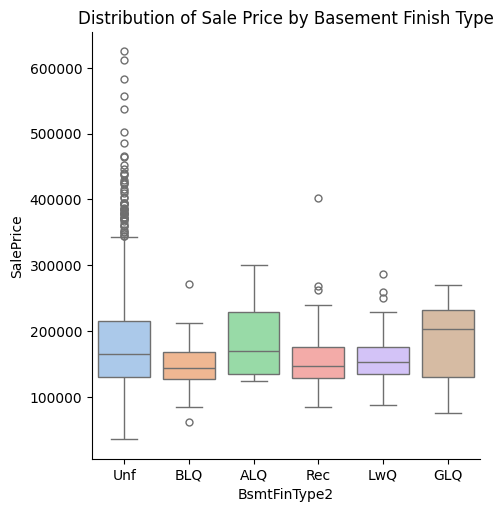

In [94]:
sns.catplot(data=train_data, x="BsmtFinType2", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Basement Finish Type")
plt.show()

In [95]:
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [96]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('No')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('No')

<ipython-input-97-cbb9f4f17a19>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="BsmtExposure", y="SalePrice", kind="box",palette='pastel')


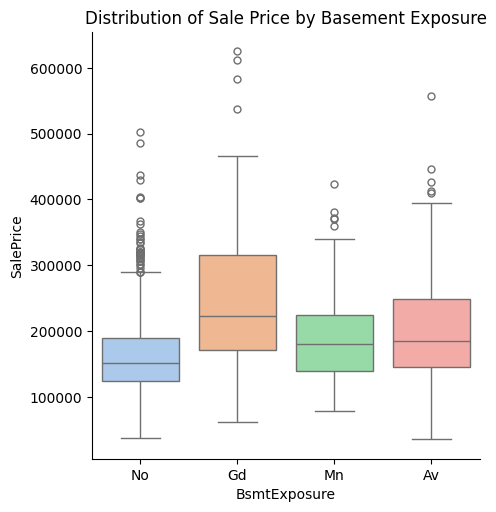

In [97]:
sns.catplot(data=train_data, x="BsmtExposure", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Basement Exposure")
plt.show()

In [98]:
train_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [99]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('No')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('No')

<ipython-input-100-5e035fee1512>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="BsmtQual", y="SalePrice", kind="box",palette='pastel')


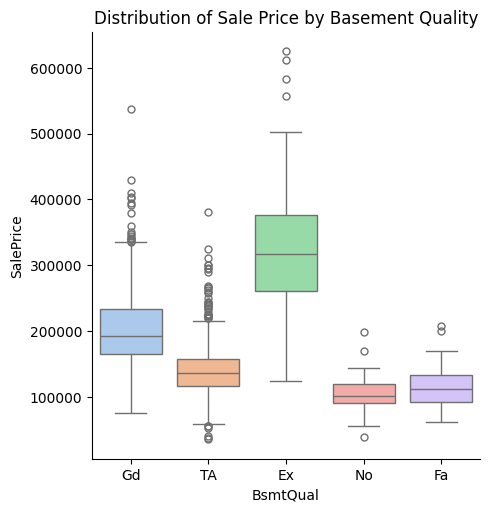

In [100]:
sns.catplot(data=train_data, x="BsmtQual", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Basement Quality")
plt.show()

In [101]:
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [102]:
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('No')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('No')

<ipython-input-103-7beb1c53c3cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="BsmtCond", y="SalePrice", kind="box",palette='pastel')


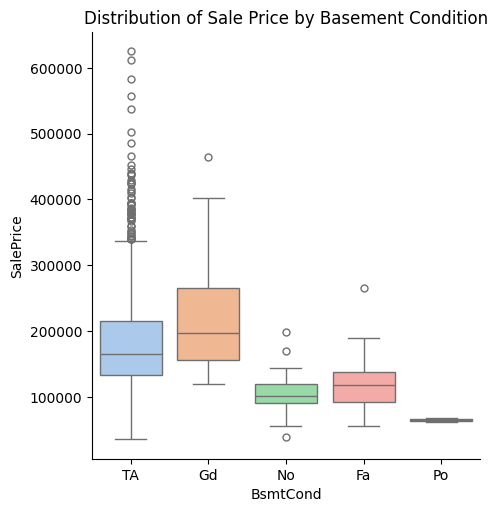

In [103]:
sns.catplot(data=train_data, x="BsmtCond", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Basement Condition")
plt.show()

In [104]:
train_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [105]:
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('No')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('No')

<ipython-input-106-ce3ac2cf73b4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=train_data, x="BsmtFinType1", y="SalePrice", kind="box",palette='pastel')


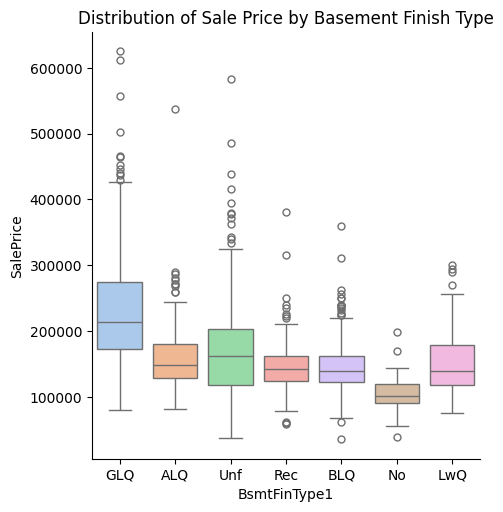

In [106]:
sns.catplot(data=train_data, x="BsmtFinType1", y="SalePrice", kind="box",palette='pastel')
plt.title("Distribution of Sale Price by Basement Finish Type")
plt.show()

In [107]:
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)
test_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)

In [108]:
train_data['Electrical']=train_data['Electrical'].fillna('SBrkr')
test_data['Electrical']=test_data['Electrical'].fillna('SBrkr')

In [109]:
# Drop these columns
train_data= train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_data= test_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [110]:
# calculate the new feature houseage
train_data['houseage']=train_data['YrSold']-train_data['YearBuilt']
test_data['houseage']=test_data['YrSold']-test_data['YearBuilt']

In [111]:
# Calculate houseremodelage
train_data['YrSold']-train_data['YearRemodAdd']
test_data['houseremodel']=test_data['YrSold']-test_data['YearRemodAdd']

In [112]:
# Calculate total square footage
train_data['totalsf']=train_data['1stFlrSF']+train_data['2ndFlrSF']+train_data['BsmtFinSF1']+train_data['BsmtFinSF2']
test_data['totalsf']=test_data['1stFlrSF']+test_data['2ndFlrSF']+test_data['BsmtFinSF1']+test_data['BsmtFinSF2']

In [113]:
# Calculate total area
train_data['totalarea']=train_data['GrLivArea']+train_data['TotalBsmtSF']
test_data['totalarea']=test_data['GrLivArea']+test_data['TotalBsmtSF']

In [114]:
# Calculate total baths
train_data['totalbaths']=train_data['BsmtFullBath']+train_data['FullBath']+0.5*(train_data['BsmtHalfBath']+train_data['HalfBath'])
test_data['totalbaths']=test_data['BsmtFullBath']+test_data['FullBath']+0.5*(test_data['BsmtHalfBath']+test_data['HalfBath'])

In [115]:
# calculate totalporches
train_data['totalporchsf']=train_data['OpenPorchSF']+train_data['EnclosedPorch']+train_data['3SsnPorch']+train_data['ScreenPorch']+train_data['WoodDeckSF']
test_data['totalporchsf']=test_data['OpenPorchSF']+test_data['EnclosedPorch']+test_data['3SsnPorch']+test_data['ScreenPorch']+test_data['WoodDeckSF']

In [116]:
# drop these columns
train_data=train_data.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_data=test_data.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

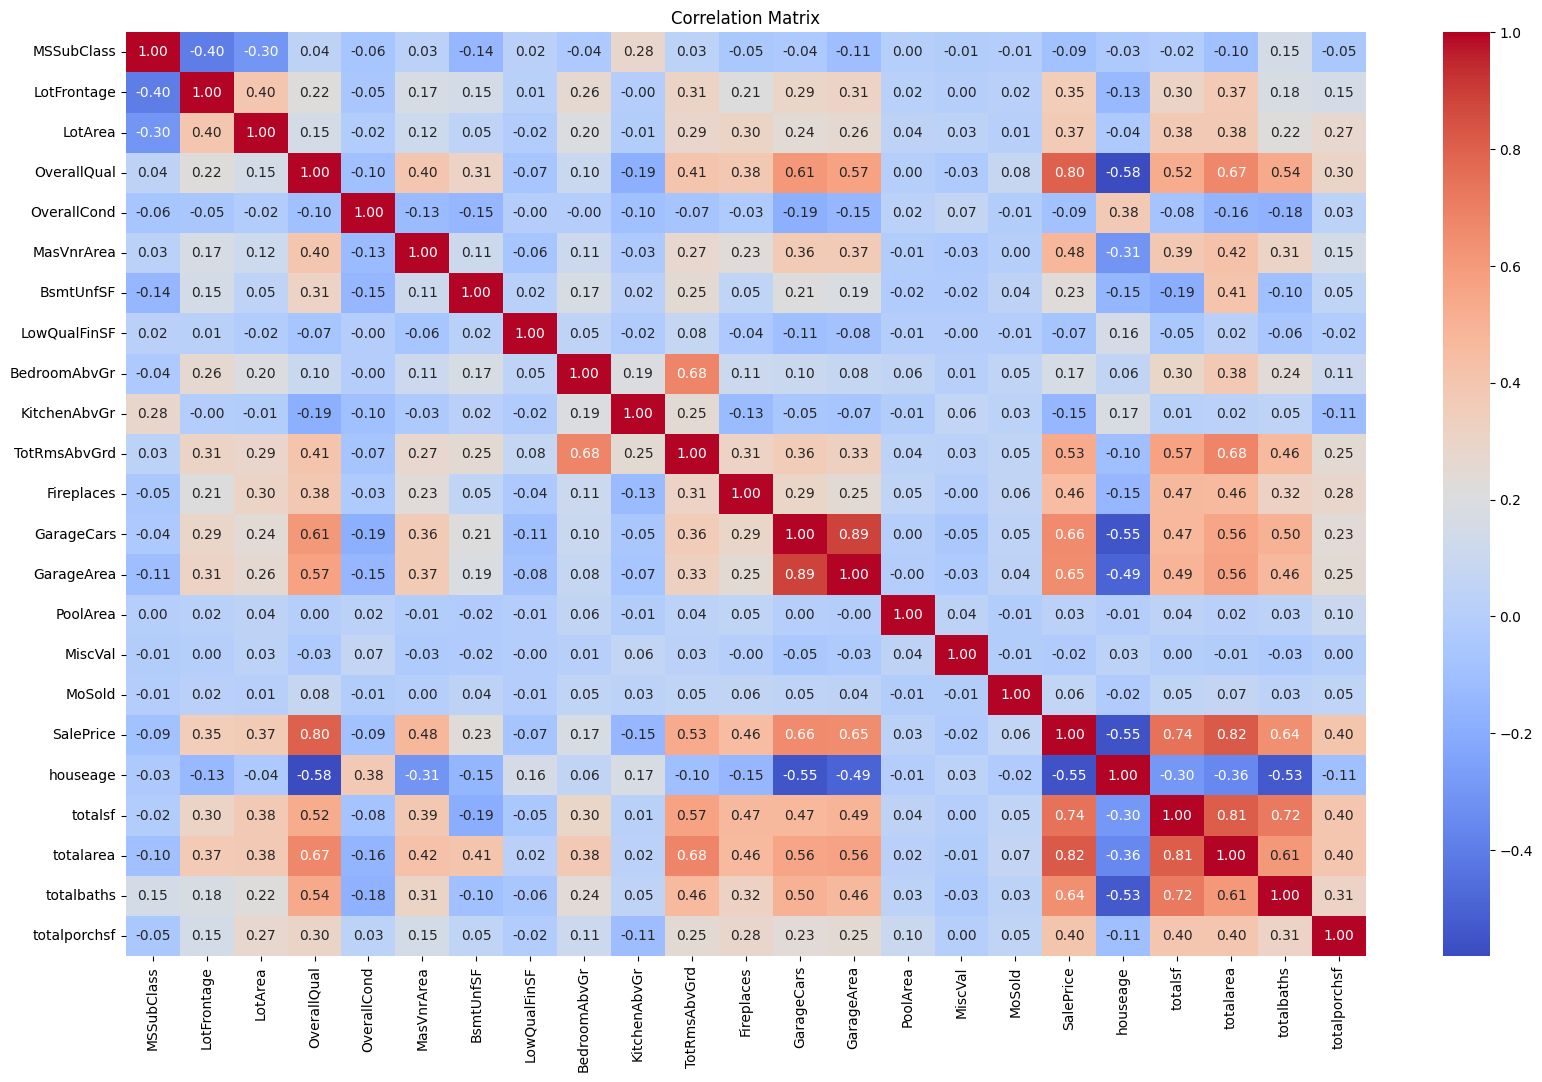

In [117]:
correlation_matrix=train_data.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [118]:
# drop GarageArea
train_data=train_data.drop(columns=['GarageArea'])
test_data=test_data.drop(columns=['GarageArea'])

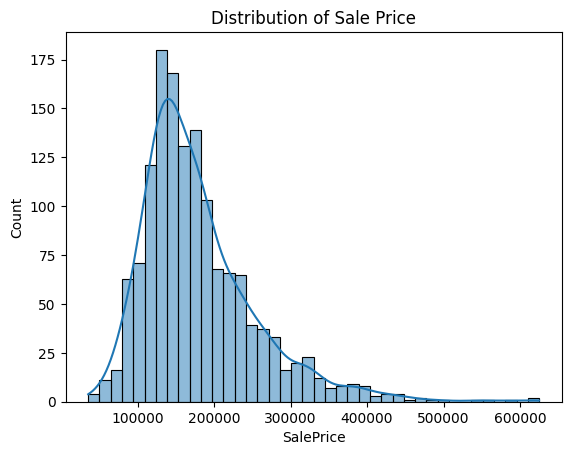

In [119]:
sns.histplot(data=train_data, x="SalePrice", kde=True,)
plt.title("Distribution of Sale Price")
plt.show()

In [120]:
train_data['SalePrice']=np.log1p(train_data['SalePrice'])

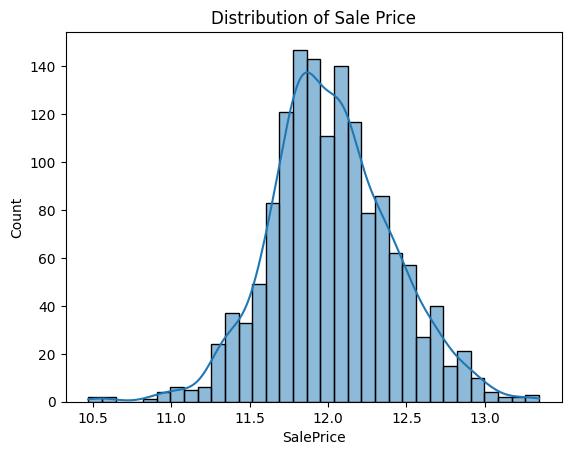

In [121]:
sns.histplot(data=train_data, x="SalePrice", kde=True)
plt.title("Distribution of Sale Price")
plt.show()

In [122]:
train_data.dtypes[train_data.dtypes=='object']

,0
MSZoning,object
Street,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object
Condition1,object
Condition2,object


In [123]:
train_data.dtypes[train_data.dtypes!='object']

,0
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
MasVnrArea,float64
BsmtUnfSF,int64
LowQualFinSF,int64
BedroomAbvGr,int64
KitchenAbvGr,int64


In [124]:
# define ordinal data
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [125]:
# define nominal data
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [126]:
# selects all the numerical columns
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [127]:
# define numerical preprocessing pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [128]:
# create preprocessing pipeline for handle categorical data
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


In [130]:
# handling categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [131]:
# Combine preprocessing pipelines for different types of features
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough',
    n_jobs=-1)

In [132]:
# Combine preprocessing with main pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [133]:
# Split data into features
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [134]:
!pip install scikit-learn==1.0.2

In [135]:
# preprocess the data
X_preprocessed = pipeline.fit_transform(X)

In [136]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [137]:
# Train a linear regression model
lr=LinearRegression()

In [138]:
lr.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred_lr=lr.predict(X_test)

In [140]:
mean_squared_error(y_test,y_pred_lr)

1.1120686401614191e+20

In [141]:
# Define Random Forest Regressor
RFR=RandomForestRegressor(random_state=13)

In [142]:
# Set up parameter grid for hyperparameter tuning
param_grid_RFR={
    'max_depth':[5,8,10,15,],
    'n_estimators':[100,250,500],
    'min_samples_split':[3,5,10]

}

In [143]:
# Perform GridSearchCV for Random Forest
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [144]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [145]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13515216139400746

In [146]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [147]:
# Define XGBoost Regressor
XGB = XGBRegressor(random_state=13)

In [148]:
# Define parameter grid for XGBoost
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [149]:
# Perform GridSearchCV for XGBoost
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [150]:
# Fit the grid search on training data
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-

In [151]:
# Get the best score
best_score_neg = xgb_cv.best_score_
# convert the negative score into positive
best_score_pos = -best_score_neg
# get the best hyperparameters
best_params = xgb_cv.best_params_

In [152]:
print(f"Best Negative Score (neg_mean_squared_error): {best_score_neg}")
print(f"Best Positive Score (Mean Squared Error): {best_score_pos}")
print(f"Best Parameters: {best_params}")

Best Negative Score (neg_mean_squared_error): -0.014303477596183499
Best Positive Score (Mean Squared Error): 0.014303477596183499
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'subsample': 0.8}


In [153]:
# calculate root mean error
np.sqrt(-1 * xgb_cv.best_score_)

0.11959714710720945

In [154]:

ridge= Ridge()

In [155]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['svd', 'lsqr', 'sag']
}


In [156]:
ridge_cv = GridSearchCV(
    ridge, param_grid_ridge, cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    error_score='raise'
)


In [157]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['svd', 'lsqr', 'sag']},
             scoring='neg_mean_squared_error')

In [158]:

# Get the best parameters
best_params = ridge_cv.best_params_
# Get the best score
best_negative_score = ridge_cv.best_score_
# Convert best score to a positive value
best_positive_score = -best_negative_score

In [159]:
print(f"Best Parameters: {best_params}")
print(f"Best Negative Score (e.g., neg MSE): {best_negative_score}")
print(f"Best Positive Score (e.g., MSE): {best_positive_score}")

Best Parameters: {'alpha': 10, 'solver': 'svd'}
Best Negative Score (e.g., neg MSE): -0.011948588405398562
Best Positive Score (e.g., MSE): 0.011948588405398562


In [160]:

np.sqrt(-1 * ridge_cv.best_score_)


0.10930959887127278

In [161]:
GBR = GradientBoostingRegressor()

In [162]:

param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [163]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [164]:

GBR_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [165]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11385607899659723

In [166]:
lgbm_regressor = lgb.LGBMRegressor()


In [167]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [168]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [169]:
lgbm_cv.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 111
[LightGBM] [Info] Start training from score 12.023259


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [170]:
np.sqrt(-1 * lgbm_cv.best_score_)


0.12760419942218262

In [171]:
!pip install catboost
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [172]:

param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [173]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [174]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ddcfaeab3d0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [175]:
np.sqrt(-1 * cat_cv.best_score_)


0.11477399043602023

In [176]:

vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [177]:
vr.fit(X_train, y_train)


VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=20,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                              

In [178]:
y_pred_vr = vr.predict(X_test)


In [179]:
mean_squared_error(y_test, y_pred_vr, squared=False)


0.11966455388455485

In [180]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [181]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [182]:
stackreg.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 111
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 105
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=20,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
  

In [183]:
y_pred_stack = stackreg.predict(X_test)


In [184]:
mean_squared_error(y_test, y_pred_stack, squared=False)


0.12091820140121734

In [185]:
test_df = test_data.copy()
df_test_preprocess = pipeline.transform(test_df)

In [196]:
print(test_df.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'PoolArea',
       'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'houseage',
       'houseremodel', 'totalsf', 'totalarea', 'totalbaths', 'totalporchsf'],
      dtype='object')


In [199]:
test_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,...,GarageCars,PoolArea,MiscVal,MoSold,houseage,houseremodel,totalsf,totalarea,totalbaths,totalporchsf
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1438.000000,1458.000000,1459.000000,1459.000000,1459.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1457.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,101.515299,554.294925,3.543523,2.854010,1.042495,...,1.766118,1.744345,58.167923,6.104181,36.411926,24.106923,1974.727709,2532.568587,2.226150,184.590816
std,42.746880,20.561228,4955.517327,1.436812,1.113740,177.315247,437.260486,44.043251,0.829788,0.208472,...,0.775945,30.491646,630.806978,2.722432,30.432248,21.131883,747.368186,786.875325,0.831114,163.357084
min,20.000000,21.000000,1470.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-1.000000,-2.000000,407.000000,612.000000,1.000000,0.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,0.000000,219.250000,0.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,4.000000,7.000000,4.000000,1480.750000,1997.000000,1.500000,51.000000
50%,50.000000,68.580357,9399.000000,6.000000,5.000000,0.000000,460.000000,0.000000,3.000000,1.000000,...,2.000000,0.000000,0.000000,6.000000,34.000000,16.000000,1829.500000,2430.500000,2.000000,166.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,162.750000,797.750000,0.000000,3.000000,1.000000,...,2.000000,0.000000,0.000000,8.000000,55.000000,44.000000,2376.000000,2982.000000,3.000000,268.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,1600.000000,2140.000000,1064.000000,6.000000,2.000000,...,5.000000,800.000000,17000.000000,12.000000,129.000000,60.000000,9105.000000,10190.000000,7.000000,1424.000000


In [187]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))


In [188]:
df_y_stacking_out = pd.DataFrame({'Id': test_data.index + 1})
df_y_stacking_out['SalePrice'] = y_stacking

In [189]:
df_y_stacking_out.to_csv('submission.csv', index=False)